In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataframe = pd.read_csv('Data/bank.csv',sep=";")

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [6]:
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
dataframe = dataframe.drop(['marital', 'housing','education', 'contact', 'day', 'month', 'poutcome','job'], axis=1)

In [8]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [9]:
dataframe.nunique()

age           67
default        2
balance     2353
loan           2
duration     875
campaign      32
pdays        292
previous      24
y              2
dtype: int64

In [10]:
dataframe.head()

,age,default,balance,loan,duration,campaign,pdays,previous,y
0,30,no,1787,no,79,1,-1,0,no
1,33,no,4789,yes,220,1,339,4,no
2,35,no,1350,no,185,1,330,1,no
3,30,no,1476,yes,199,4,-1,0,no
4,59,no,0,no,226,1,-1,0,no


In [11]:
# dataframe['default','y','loan']=dataframe['default','y','loan'].replace(['yes','no'],[1,0],inplace=True)
dataframe.replace(['yes','no'],[1,0],inplace=True)

In [12]:
dataframe.head()

,age,default,balance,loan,duration,campaign,pdays,previous,y
0,30,0,1787,0,79,1,-1,0,0
1,33,0,4789,1,220,1,339,4,0
2,35,0,1350,0,185,1,330,1,0
3,30,0,1476,1,199,4,-1,0,0
4,59,0,0,0,226,1,-1,0,0


In [13]:
dataframe.shape

(4521, 9)

In [14]:
# as removed categorical columns so no need of onhot encoding
# dataframe = pd.get_dummies(dataframe)

In [15]:
dataframe.shape

(4521, 9)

In [16]:
def feature_scaling(dataframe,column):
    dataframe[column] = np.divide(np.subtract(dataframe,dataframe[column].mean()),
                                  dataframe[column].std())
    return dataframe[column]

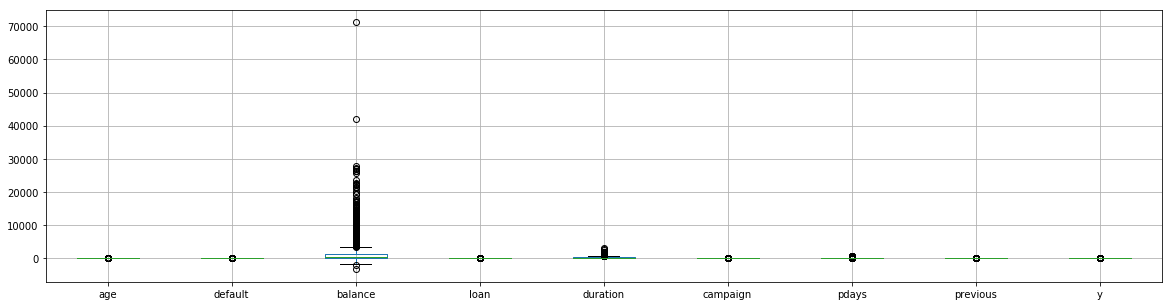

In [17]:
dataframe.boxplot(figsize=(20,5))

In [18]:
column = ['age','balance','duration','campaign','pdays','previous']
for item in column:
    dataframe[item] = feature_scaling(dataframe,item)

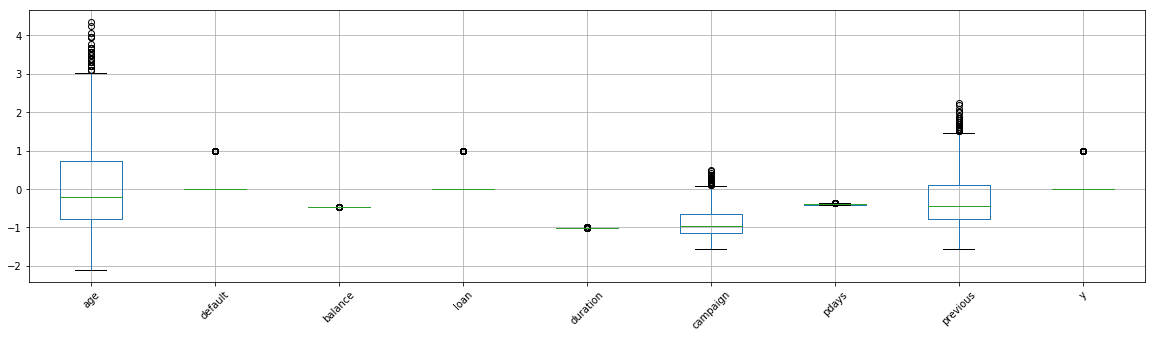

In [19]:
dataframe.boxplot(figsize=(20,5),rot=45)

In [20]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,-1.116976e-16,1.000000,-2.096223,-0.772497,-0.205186,0.740332,4.333301
default,4521.0,1.681044e-02,0.128575,0.000000,0.000000,0.000000,0.000000,1.000000
balance,4521.0,-4.727006e-01,0.000332,-0.473397,-0.472957,-0.472769,-0.472455,-0.471261
loan,4521.0,1.528423e-01,0.359875,0.000000,0.000000,0.000000,0.000000,1.000000
duration,4521.0,-1.015796e+00,0.003848,-1.023863,-1.018769,-1.016585,-1.012947,-0.999120
campaign,4521.0,-8.983291e-01,0.321563,-1.572398,-1.146736,-0.964310,-0.660265,0.495102
pdays,4521.0,-3.971854e-01,0.009988,-0.418122,-0.404901,-0.399235,-0.389791,-0.353905
previous,4521.0,-3.203774e-01,0.590471,-1.558137,-0.776515,-0.441534,0.116767,2.238313
y,4521.0,1.152400e-01,0.319347,0.000000,0.000000,0.000000,0.000000,1.000000


In [21]:
def split(dataframe):
    test_data = dataframe.tail(500).reset_index(drop=True)
    return dataframe.head(len(dataframe)-500).reset_index(), test_data.reset_index()

In [22]:
dataframe, test_data = split(dataframe)

In [23]:
dataframe.describe()

,index,age,default,balance,loan,duration,campaign,pdays,previous,y
count,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000
mean,2010.000000,0.003011,0.017409,-0.472700,0.153693,-1.015784,-0.897361,-0.397155,-0.318599,0.114151
std,1160.907045,1.000018,0.130804,0.000332,0.360699,0.003848,0.321569,0.009988,0.590482,0.318034
min,0.000000,-2.096223,0.000000,-0.473397,0.000000,-1.023863,-1.572398,-0.418122,-1.558137,0.000000
25%,1005.000000,-0.772497,0.000000,-0.472957,0.000000,-1.018769,-1.146736,-0.404901,-0.776515,0.000000
50%,2010.000000,-0.205186,0.000000,-0.472769,0.000000,-1.016585,-0.964310,-0.399235,-0.441534,0.000000
75%,3015.000000,0.740332,0.000000,-0.472455,0.000000,-1.012947,-0.660265,-0.389791,0.116767,0.000000
max,4020.000000,4.333301,1.000000,-0.471261,1.000000,-0.999120,0.495102,-0.353905,2.238313,1.000000


In [24]:
def KNN_Algo(dataframe,test_data):
    # stores the num rows in test data
    test_size = test_data.shape[0]
    # stores the num rows in dataframe
    data_size = dataframe.shape[0]
    # storing original outputs
    original_outputs = test_data.loc[:,'y']
    # storing the outputs of dataframe
    data_outputs = dataframe['y']
    # deleting the outputs from dataframe for computing
    dataframe = dataframe.drop('y',axis=1)
    #deleting the output rows as we'll be compuing on the basis of other rows
    test_data = test_data.drop('y', axis=1)
    predicted_outputs = pd.Series(np.zeros(test_size))
    # Data frame to store the distances using Eucledian distance
    Eucledian_dist = pd.DataFrame(columns=['dist','y'])
    k = 5
    for counter1 in range(0,test_size):
        for counter2 in range(0,data_size):
            Eucledian_dist.loc[counter2,'dist'] = np.sum(np.square(
                                                  np.subtract(test_data.iloc[counter1,:],dataframe.iloc[counter2,:]
                                                  )
                                                )
                                             )
            # storing the values of the output as well so that when we sort the outputs should also be sorted for comparison
            Eucledian_dist.loc[counter2,'y'] = data_outputs[counter2]
        # taking square roots 
        Eucledian_dist.dist = np.power(Eucledian_dist.dist,0.5)
        Eucledian_dist = Eucledian_dist.sort_values(by=['dist'])
#         print(Eucledian_dist.head(),'tail', Eucledian_dist.tail(),'uniques', Eucledian_dist.nunique())
        # If the sum of top k elements more than half of the value of K 
        # eg. k = 5 and number of 1 is 3 that is greater than 2.5 then it sores 1 else 0
        if((Eucledian_dist.y[:k]==1).sum() >(k/2)):
            predicted_outputs[counter1] = 1
        else: 
            predicted_outputs[counter1] = 0
#         print("Testcase:{}, predicted:{}".format(counter1,predicted_outputs[counter1]))
    # taking count of similar elements
    similars = (original_outputs[:]==predicted_outputs[:]).sum()
    accuracy  = similars/test_size
    print("Accuracy",accuracy*100)

In [25]:
# dataframe=dataframe.describe().T.loc[:,['min', 'max','std']].head(3)

In [26]:
KNN_Algo(dataframe,test_data)

Accuracy 85.2
